In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindata = pd.read_csv('/content/train_ctrUa4K.csv')

In [3]:
traindata.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# Dropping Loan_ID column
traindata.drop(['Loan_ID'],axis=1,inplace=True)

Pre-processing train data

In [5]:
traindata.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
traindata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
traindata.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#Handling missing values
traindata.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
for i in['LoanAmount','Loan_Amount_Term','Credit_History']:
  traindata[i]=traindata[i].fillna(traindata[i].median())

for j in['Gender','Married','Dependents','Self_Employed']:
  traindata[j]=traindata[j].fillna(traindata[j].mode().iloc[0]) 

traindata.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#Encoding traindata
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in traindata.columns:
    if traindata[col].dtype == 'object':
       traindata[col] = enc.fit_transform(traindata[col])

In [157]:
traindata.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,360.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1
613,0,0,0,0,1,4583.0,0.0,133.0,360.0,0.0,1,0


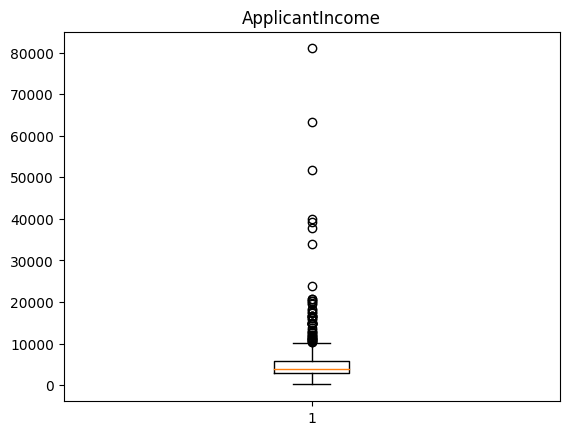

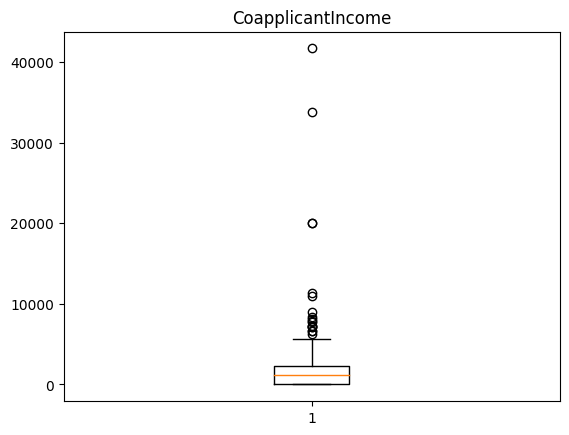

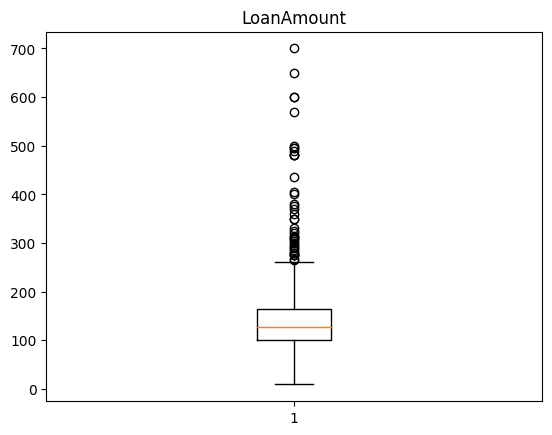

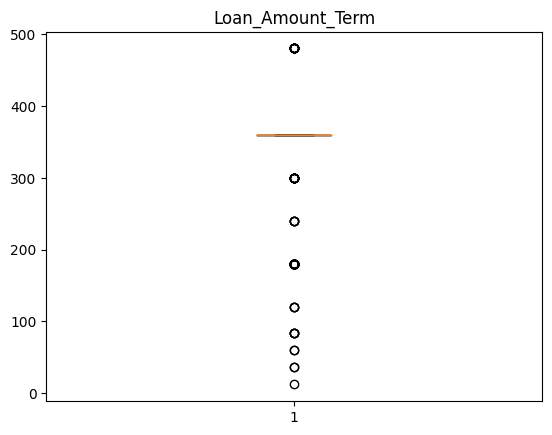

In [12]:
#Outlier finding
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
  plt.figure()
  plt.boxplot(traindata[i])
  plt.title(i)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Gender'),
  Text(1.5, 0, 'Married'),
  Text(2.5, 0, 'Dependents'),
  Text(3.5, 0, 'Education'),
  Text(4.5, 0, 'Self_Employed'),
  Text(5.5, 0, 'ApplicantIncome'),
  Text(6.5, 0, 'CoapplicantIncome'),
  Text(7.5, 0, 'LoanAmount'),
  Text(8.5, 0, 'Loan_Amount_Term'),
  Text(9.5, 0, 'Credit_History'),
  Text(10.5, 0, 'Property_Area'),
  Text(11.5, 0, 'Loan_Status')])

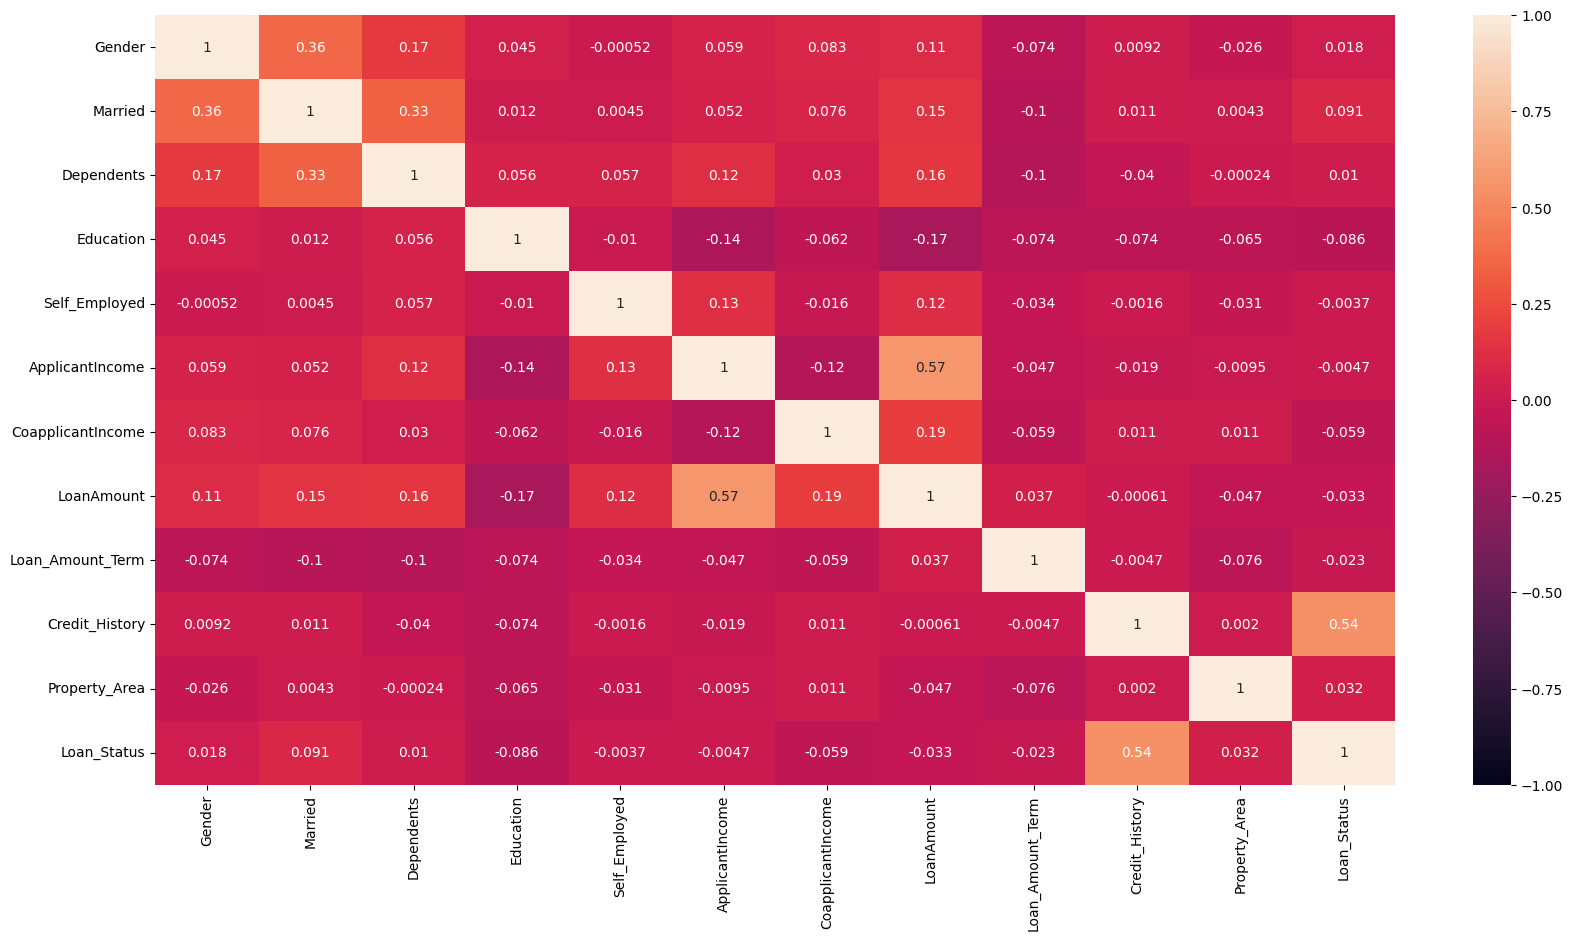

In [13]:
corrmatrix = traindata.corr()
plt.subplots(figsize =(20,10))
sns.heatmap(corrmatrix,annot=True,vmax=1,vmin=-1)
plt.xticks(rotation=90)

In [14]:
#Outlier handling of Applicant income
Q11=np.percentile(traindata['ApplicantIncome'],25,interpolation='midpoint')
Q12=np.percentile(traindata['ApplicantIncome'],50,interpolation='midpoint')
Q13=np.percentile(traindata['ApplicantIncome'],75,interpolation='midpoint')

<ipython-input-14-273b0de7a2bd>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q11=np.percentile(traindata['ApplicantIncome'],25,interpolation='midpoint')
<ipython-input-14-273b0de7a2bd>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q12=np.percentile(traindata['ApplicantIncome'],50,interpolation='midpoint')
<ipython-input-14-273b0de7a2bd>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumP

In [15]:
print(Q11)
print(Q12)
print(Q13)

2879.0
3812.5
5790.0


In [16]:
IQR1 = Q13-Q11
IQR1

2911.0

In [17]:
up_lim1= Q13 + 1.5*IQR1
up_lim1

10156.5

In [18]:
low_lim1= Q11 - 1.5*IQR1
low_lim1

-1487.5

In [19]:
def AI(h_a_i,low_lim1,up_lim1):
  for i in range(len(h_a_i)):
    if h_a_i[i] < low_lim1:
      h_a_i[i] = low_lim1
    elif h_a_i[i]>up_lim1:
      h_a_i[i] = up_lim1
    else :
      h_a_i[i]==h_a_i
  return AI

In [20]:
new_app_inc = traindata['ApplicantIncome']
AI(new_app_inc,low_lim1,up_lim1)
print(new_app_inc)

<ipython-input-19-a1f36cce6f4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_a_i[i] = up_lim1


0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1846ee04c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1846ee0a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1846ee0220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1846ee0f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1846ee11e0>],
 'means': []}

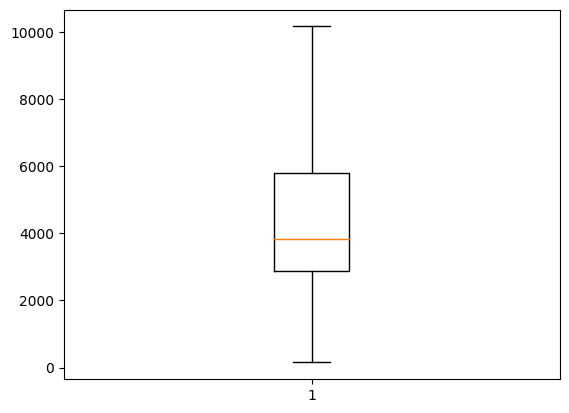

In [21]:
plt.boxplot(traindata['ApplicantIncome'])

In [22]:
#Outlier handling of Coapplicant income
Q21=np.percentile(traindata['CoapplicantIncome'],25,interpolation='midpoint')
Q22=np.percentile(traindata['CoapplicantIncome'],50,interpolation='midpoint')
Q23=np.percentile(traindata['CoapplicantIncome'],75,interpolation='midpoint')

<ipython-input-22-7d26032d8f7d>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q21=np.percentile(traindata['CoapplicantIncome'],25,interpolation='midpoint')
<ipython-input-22-7d26032d8f7d>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q22=np.percentile(traindata['CoapplicantIncome'],50,interpolation='midpoint')
<ipython-input-22-7d26032d8f7d>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated 

In [23]:
print(Q21)
print(Q22)
print(Q23)

0.0
1188.5
2292.5


In [24]:
IQR2 = Q23-Q21
IQR2

2292.5

In [25]:
up_lim2= Q23 + 1.5*IQR2
up_lim2

5731.25

In [26]:
low_lim2= Q21 - 1.5*IQR2
low_lim2

-3438.75

In [27]:
def CaI(h_co_i,low_lim2,up_lim2):
  for i in range(len(h_co_i)):
    if h_co_i[i] < low_lim2:
      h_co_i[i] = low_lim2
    elif h_co_i[i]>up_lim2:
      h_co_i[i] = up_lim2
    else :
      h_co_i[i]==h_co_i
  return CaI

In [28]:
new_coapp_inc = traindata['CoapplicantIncome']
CaI(new_coapp_inc,low_lim2,up_lim2)
print(new_coapp_inc)

<ipython-input-27-6811c6697e02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_co_i[i] = up_lim2


0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1846f3aef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1846f3b370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1846f3ac50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1846f3b7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1846f3ba60>],
 'means': []}

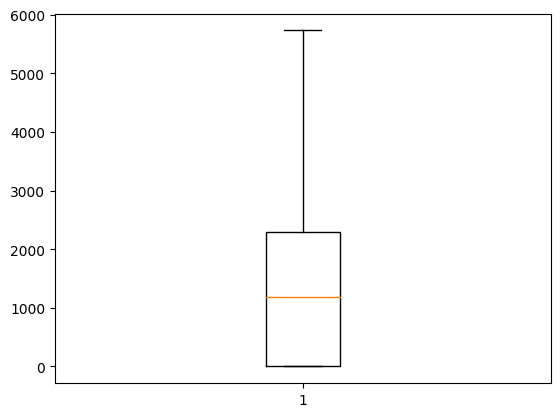

In [29]:
plt.boxplot(traindata['CoapplicantIncome'])

In [30]:
#Outlier handling of Loan Amount
Q31=np.percentile(traindata['LoanAmount'],25,interpolation='midpoint')
Q32=np.percentile(traindata['LoanAmount'],50,interpolation='midpoint')
Q33=np.percentile(traindata['LoanAmount'],75,interpolation='midpoint')

<ipython-input-30-9c624147bcbb>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q31=np.percentile(traindata['LoanAmount'],25,interpolation='midpoint')
<ipython-input-30-9c624147bcbb>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q32=np.percentile(traindata['LoanAmount'],50,interpolation='midpoint')
<ipython-input-30-9c624147bcbb>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  

In [31]:
print(Q31)
print(Q32)
print(Q33)

100.5
128.0
164.5


In [32]:
IQR3 = Q33-Q31
IQR3

64.0

In [33]:
up_lim3= Q33 + 1.5*IQR3
up_lim3

260.5

In [34]:
low_lim3= Q31 - 1.5*IQR3
low_lim3

4.5

In [35]:
def LA(h_l_a,low_lim3,up_lim3):
  for i in range(len(h_l_a)):
    if h_l_a[i] < low_lim3:
      h_l_a[i] = low_lim3
    elif h_l_a[i]>up_lim3:
      h_l_a[i] = up_lim3
    else :
      h_l_a[i]==h_l_a
  return LA

In [36]:
new_loan_amt = traindata['LoanAmount']
LA(new_loan_amt,low_lim3,up_lim3)
print(new_loan_amt)

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


<ipython-input-35-794a5f0e33ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_l_a[i] = up_lim3


{'whiskers': [<matplotlib.lines.Line2D at 0x7f18477531c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1847753700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1847752f20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1847753c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1847753ee0>],
 'means': []}

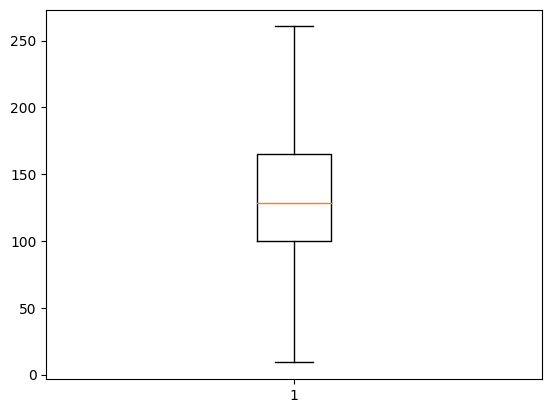

In [37]:
plt.boxplot(traindata['LoanAmount'])

In [38]:
#Outlier handling of Loan Amount Term
Q41=np.percentile(traindata['Loan_Amount_Term'],25,interpolation='midpoint')
Q42=np.percentile(traindata['Loan_Amount_Term'],50,interpolation='midpoint')
Q43=np.percentile(traindata['Loan_Amount_Term'],75,interpolation='midpoint')

<ipython-input-38-134e4511ce70>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q41=np.percentile(traindata['Loan_Amount_Term'],25,interpolation='midpoint')
<ipython-input-38-134e4511ce70>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q42=np.percentile(traindata['Loan_Amount_Term'],50,interpolation='midpoint')
<ipython-input-38-134e4511ce70>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated Nu

In [39]:
print(Q41)
print(Q42)
print(Q43)

360.0
360.0
360.0


In [40]:
def LAT(h_l_at):
  for i in range(len(h_l_at)):
    if h_l_at[i] < 360:
      h_l_at[i] = 360
    elif h_l_at[i]>360:
      h_l_at[i] = 360
    else :
      h_l_at[i]==h_l_at
  return LAT

In [41]:
new_loan_amt_term = traindata['Loan_Amount_Term']
LAT(new_loan_amt_term)
print(new_loan_amt_term)

<ipython-input-40-9132b5e8077d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_l_at[i] = 360
<ipython-input-40-9132b5e8077d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_l_at[i] = 360


0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    360.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64


In [42]:
traindata.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,4615.910423,1419.354104,137.298860,360.0,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,2477.158964,1623.678913,55.631264,0.0,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.0,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.0,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.0,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10156.500000,5731.250000,260.500000,360.0,1.000000,2.000000,1.000000


In [43]:
x=traindata.drop('Loan_Status',axis=1)
y=traindata['Loan_Status']

In [44]:
x1 = x.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [45]:
x1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,4615.910423,1419.354104,137.298860
std,2477.158964,1623.678913,55.631264
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,10156.500000,5731.250000,260.500000


In [46]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1=min_max_scaler.fit_transform(x1)

In [47]:
x1

array([[0.56952981, 0.        , 0.47316103],
       [0.44301204, 0.26311887, 0.47316103],
       [0.28481487, 0.        , 0.22664016],
       ...,
       [0.7916854 , 0.04187568, 0.97017893],
       [0.74281717, 0.        , 0.70775348],
       [0.44301204, 0.        , 0.49304175]])

In [48]:
x1=pd.DataFrame(x1,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
x1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.569530,0.000000,0.473161
1,0.443012,0.263119,0.473161
2,0.284815,0.000000,0.226640
3,0.243142,0.411429,0.441352
4,0.584620,0.000000,0.524851
...,...,...,...
609,0.274821,0.000000,0.246521
610,0.395343,0.000000,0.123260
611,0.791685,0.041876,0.970179
612,0.742817,0.000000,0.707753


In [49]:
x2= x.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
x2

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,360.0,1.0,2
1,1,1,1,0,0,360.0,1.0,0
2,1,1,0,0,1,360.0,1.0,2
3,1,1,0,1,0,360.0,1.0,2
4,1,0,0,0,0,360.0,1.0,2
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,360.0,1.0,0
610,1,1,3,0,0,360.0,1.0,0
611,1,1,1,0,0,360.0,1.0,2
612,1,1,2,0,0,360.0,1.0,2


In [50]:
x3=pd.concat([x2,x1],axis=1)
x3

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,0,0,0,0,360.0,1.0,2,0.569530,0.000000,0.473161
1,1,1,1,0,0,360.0,1.0,0,0.443012,0.263119,0.473161
2,1,1,0,0,1,360.0,1.0,2,0.284815,0.000000,0.226640
3,1,1,0,1,0,360.0,1.0,2,0.243142,0.411429,0.441352
4,1,0,0,0,0,360.0,1.0,2,0.584620,0.000000,0.524851
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,360.0,1.0,0,0.274821,0.000000,0.246521
610,1,1,3,0,0,360.0,1.0,0,0.395343,0.000000,0.123260
611,1,1,1,0,0,360.0,1.0,2,0.791685,0.041876,0.970179
612,1,1,2,0,0,360.0,1.0,2,0.742817,0.000000,0.707753


In [51]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x3,y,random_state = 42,test_size=0.25)

In [52]:
#Model Fitting

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [54]:
print('Accuracy is', accuracy_score(y_test,y_pred))
print('Precision is', precision_score(y_test,y_pred))
print('Recall is', recall_score(y_test,y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7727272727272727
Precision is 0.7480916030534351
Recall is 0.98
f1 score is 0.8484848484848484


In [55]:
#kNN 
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) # if metric='manhattan' use p=1
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)


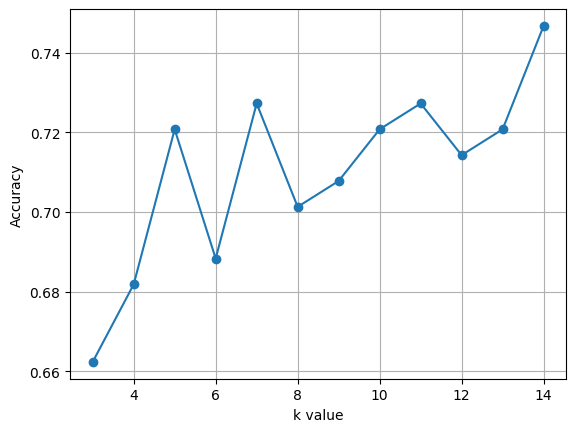

In [56]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [57]:
classifier = KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=2) # if metric='manhattan' use p=1
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [58]:
print('Accuracy is', accuracy_score(y_test,y_pred))
print('Precision is', precision_score(y_test,y_pred))
print('Recall is', recall_score(y_test,y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7467532467532467
Precision is 0.7226277372262774
Recall is 0.99
f1 score is 0.8354430379746836


In [59]:
# SVM 
# svm model using linear
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [60]:
y_pred = svmclf.predict(x_test)

In [61]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.7727272727272727


In [62]:
# SVM model using rbf
from sklearn.svm import SVC
svmclf = SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [63]:
y_pred = svmclf.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.6493506493506493


In [64]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [65]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.6818181818181818


In [66]:
print(confusion_matrix(y_test,y_pred))

[[26 28]
 [21 79]]


In [67]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = rf_clf.predict(x_test)

In [69]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.7597402597402597


In [70]:
print(confusion_matrix(y_test,y_pred))

[[25 29]
 [ 8 92]]


In [71]:
#Hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_clf1= RandomForestClassifier(random_state=42,n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       n_estimators=20, random_state=42)

In [72]:
y_pred1 = rf_clf1.predict(x_test)

In [73]:
print('Accuracy is :',accuracy_score(y_test,y_pred1))

Accuracy is : 0.7727272727272727


In [74]:
#Loading Test dataset
testdata = pd.read_csv('/content/test_lAUu6dG.csv')

In [75]:
testdata.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [76]:
userID = testdata['Loan_ID']
userID

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [77]:
# Dropping Loan_ID column
testdata1=testdata.drop(['Loan_ID'],axis=1)

Pre-processing Test data

In [78]:
testdata1.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [79]:
testdata1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [80]:
testdata1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [81]:
#Handling missing values
for i in['LoanAmount','Loan_Amount_Term','Credit_History']:
  testdata1[i]=testdata1[i].fillna(testdata1[i].median())

for j in['Gender','Dependents','Self_Employed']:
  testdata1[j]=testdata1[j].fillna(testdata1[j].mode().iloc[0]) 

testdata1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [82]:
#Encoding testdata
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in testdata1.columns:
    if testdata1[col].dtype == 'object':
       testdata1[col] = enc.fit_transform(testdata1[col])

In [83]:
testdata1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


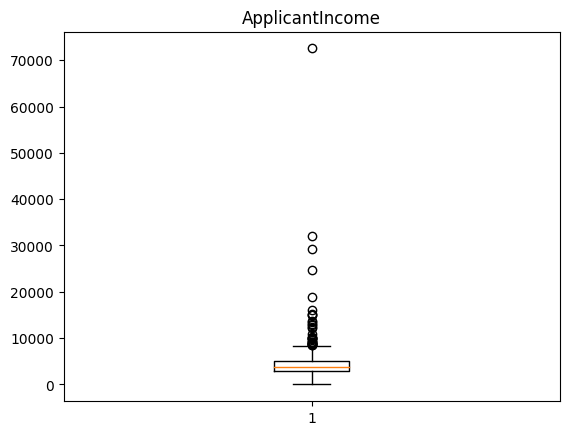

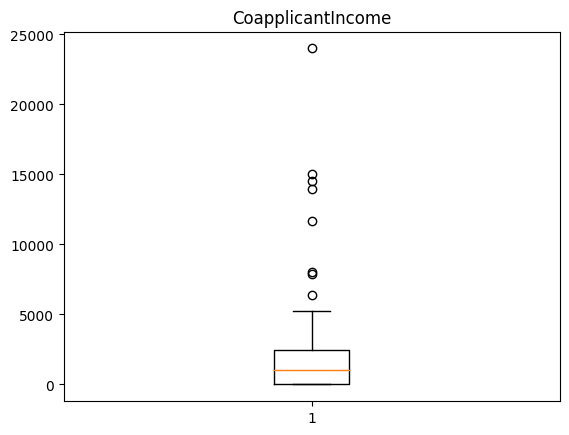

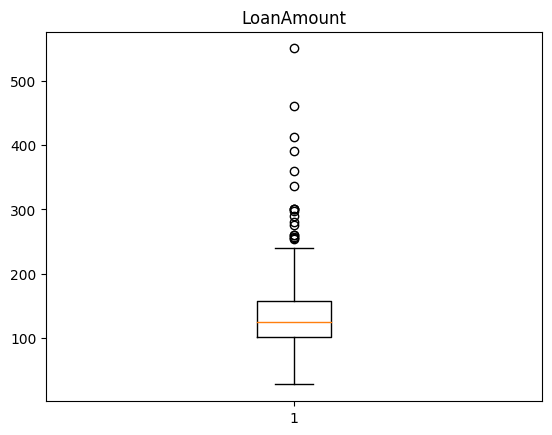

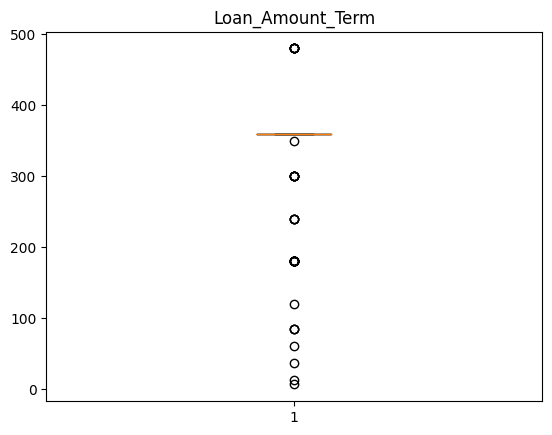

In [84]:
#Outlier finding
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
  plt.figure()
  plt.boxplot(testdata1[i])
  plt.title(i)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Gender'),
  Text(1.5, 0, 'Married'),
  Text(2.5, 0, 'Dependents'),
  Text(3.5, 0, 'Education'),
  Text(4.5, 0, 'Self_Employed'),
  Text(5.5, 0, 'ApplicantIncome'),
  Text(6.5, 0, 'CoapplicantIncome'),
  Text(7.5, 0, 'LoanAmount'),
  Text(8.5, 0, 'Loan_Amount_Term'),
  Text(9.5, 0, 'Credit_History'),
  Text(10.5, 0, 'Property_Area')])

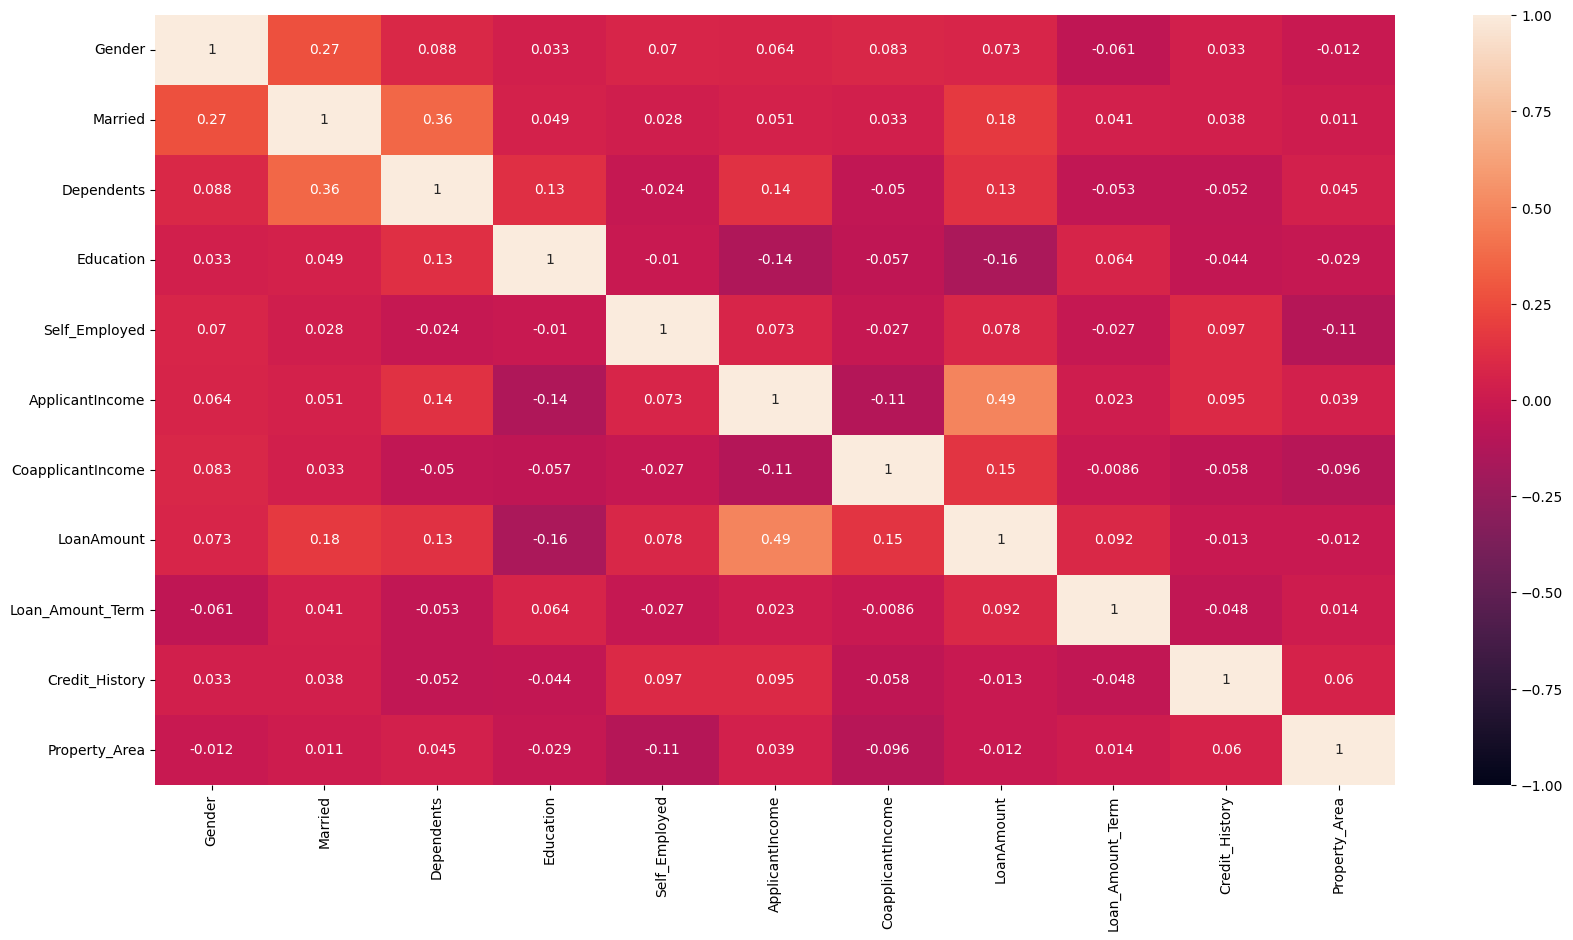

In [85]:
corrmatrix = testdata1.corr()
plt.subplots(figsize =(20,10))
sns.heatmap(corrmatrix,annot=True,vmax=1,vmin=-1)
plt.xticks(rotation=90)

In [86]:
#Outlier handling of Applicant income in test data
Q111=np.percentile(testdata1['ApplicantIncome'],25,interpolation='midpoint')
Q112=np.percentile(testdata1['ApplicantIncome'],50,interpolation='midpoint')
Q113=np.percentile(testdata1['ApplicantIncome'],75,interpolation='midpoint')

<ipython-input-86-03a3c825908c>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q111=np.percentile(testdata1['ApplicantIncome'],25,interpolation='midpoint')
<ipython-input-86-03a3c825908c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q112=np.percentile(testdata1['ApplicantIncome'],50,interpolation='midpoint')
<ipython-input-86-03a3c825908c>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated Nu

In [87]:
IQR11 = Q13-Q11
IQR11


2911.0

In [88]:
up_lim11= Q13 + 1.5*IQR1
up_lim11

10156.5

In [89]:
low_lim11= Q11 - 1.5*IQR1
low_lim11

-1487.5

In [90]:
def AI1(h_a_i,low_lim11,up_lim11):
  for i in range(len(h_a_i)):
    if h_a_i[i] < low_lim11:
      h_a_i[i] = low_lim11
    elif h_a_i[i]>up_lim11:
      h_a_i[i] = up_lim11
    else :
      h_a_i[i]==h_a_i
  return AI1

In [91]:
new_app_inc1 = testdata1['ApplicantIncome']
AI1(new_app_inc1,low_lim11,up_lim11)
print(new_app_inc1)

<ipython-input-90-c7b7cfec544b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_a_i[i] = up_lim11


0      5720.0
1      3076.0
2      5000.0
3      2340.0
4      3276.0
        ...  
362    4009.0
363    4158.0
364    3250.0
365    5000.0
366    9200.0
Name: ApplicantIncome, Length: 367, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1844cf1270>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18446b0460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1844cf14b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f18446b2080>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f18446b0f40>],
 'means': []}

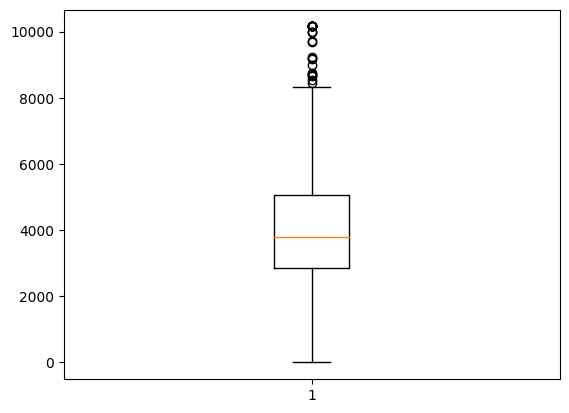

In [92]:
plt.boxplot(testdata1['ApplicantIncome'])

In [93]:
#Outlier handling of Coapplicant income in test data
Q221=np.percentile(testdata1['CoapplicantIncome'],25,interpolation='midpoint')
Q222=np.percentile(testdata1['CoapplicantIncome'],50,interpolation='midpoint')
Q223=np.percentile(testdata1['CoapplicantIncome'],75,interpolation='midpoint')

<ipython-input-93-39e7730af3cb>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q221=np.percentile(testdata1['CoapplicantIncome'],25,interpolation='midpoint')
<ipython-input-93-39e7730af3cb>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q222=np.percentile(testdata1['CoapplicantIncome'],50,interpolation='midpoint')
<ipython-input-93-39e7730af3cb>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecate

In [94]:
IQR22 = Q223-Q221
IQR22

2430.5

In [95]:
up_lim22= Q223 + 1.5*IQR22
up_lim22

6076.25

In [96]:
low_lim22= Q221 - 1.5*IQR22
low_lim22

-3645.75

In [97]:
def CaI2(h_co_i,low_lim22,up_lim22):
  for i in range(len(h_co_i)):
    if h_co_i[i] < low_lim22:
      h_co_i[i] = low_lim22
    elif h_co_i[i]>up_lim22:
      h_co_i[i] = up_lim22
    else :
      h_co_i[i]==h_co_i
  return CaI2

In [98]:
new_coapp_inc2 = testdata1['CoapplicantIncome']
CaI2(new_coapp_inc2,low_lim22,up_lim22)
print(new_coapp_inc2)

<ipython-input-97-2b555e9901a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_co_i[i] = up_lim22


0         0.0
1      1500.0
2      1800.0
3      2546.0
4         0.0
        ...  
362    1777.0
363     709.0
364    1993.0
365    2393.0
366       0.0
Name: CoapplicantIncome, Length: 367, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1844538df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1844539330>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1844538b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1844539870>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1844539b10>],
 'means': []}

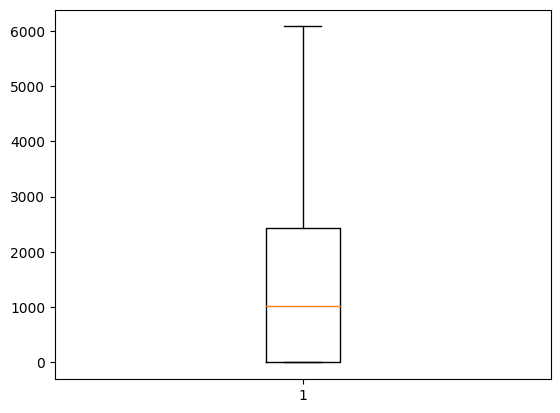

In [99]:
plt.boxplot(testdata1['CoapplicantIncome'])

In [100]:
#Outlier handling of Loan Amount of test data
Q331=np.percentile(testdata1['LoanAmount'],25,interpolation='midpoint')
Q332=np.percentile(testdata1['LoanAmount'],50,interpolation='midpoint')
Q333=np.percentile(testdata1['LoanAmount'],75,interpolation='midpoint')

<ipython-input-100-6b48e7040e33>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q331=np.percentile(testdata1['LoanAmount'],25,interpolation='midpoint')
<ipython-input-100-6b48e7040e33>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q332=np.percentile(testdata1['LoanAmount'],50,interpolation='midpoint')
<ipython-input-100-6b48e7040e33>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.2

In [101]:
IQR33 = Q333-Q331
IQR33

56.5

In [102]:
up_lim33= Q333 + 1.5*IQR33
up_lim33

242.25

In [103]:
low_lim33= Q331 - 1.5*IQR33
low_lim33

16.25

In [104]:
def LA3(h_l_a,low_lim33,up_lim33):
  for i in range(len(h_l_a)):
    if h_l_a[i] < low_lim33:
      h_l_a[i] = low_lim33
    elif h_l_a[i]>up_lim33:
      h_l_a[i] = up_lim33
    else :
      h_l_a[i]==h_l_a
  return LA3

In [105]:
new_loan_amt3 = testdata1['LoanAmount']
LA3(new_loan_amt3,low_lim33,up_lim33)
print(new_loan_amt3)

<ipython-input-104-fff1a770fd78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_l_a[i] = up_lim33


0      110.0
1      126.0
2      208.0
3      100.0
4       78.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 367, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f18445b4f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18445b5450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18445b4c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f18445b5990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f18445b5c30>],
 'means': []}

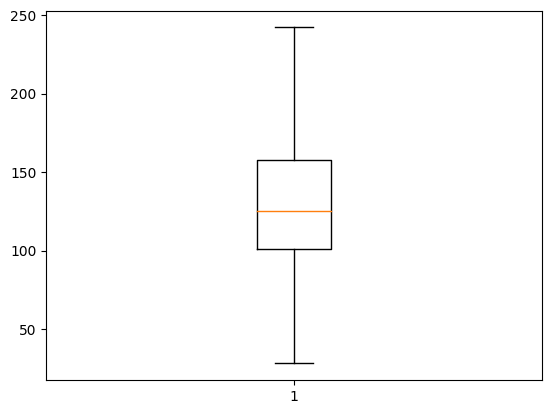

In [106]:
plt.boxplot(testdata1['LoanAmount'])

In [107]:
#Outlier handling of Loan Amount Term in test data
Q441=np.percentile(testdata1['Loan_Amount_Term'],25,interpolation='midpoint')
Q442=np.percentile(testdata1['Loan_Amount_Term'],50,interpolation='midpoint')
Q443=np.percentile(testdata1['Loan_Amount_Term'],75,interpolation='midpoint')

<ipython-input-107-6f23004d990c>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q441=np.percentile(testdata1['Loan_Amount_Term'],25,interpolation='midpoint')
<ipython-input-107-6f23004d990c>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q442=np.percentile(testdata1['Loan_Amount_Term'],50,interpolation='midpoint')
<ipython-input-107-6f23004d990c>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecat

In [108]:
print(Q441)
print(Q442)
print(Q443)

360.0
360.0
360.0


In [109]:
def LAT4(h_l_at):
  for i in range(len(h_l_at)):
    if h_l_at[i] < 360:
      h_l_at[i] = 360
    elif h_l_at[i]>360:
      h_l_at[i] = 360
    else :
      h_l_at[i]==h_l_at
  return LAT4

In [110]:
new_loan_amt_term4 = testdata1['Loan_Amount_Term']
LAT4(new_loan_amt_term4)
print(new_loan_amt_term4)

<ipython-input-109-8f8d8cb1123e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_l_at[i] = 360
<ipython-input-109-8f8d8cb1123e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_l_at[i] = 360


0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
362    360.0
363    360.0
364    360.0
365    360.0
366    360.0
Name: Loan_Amount_Term, Length: 367, dtype: float64


In [111]:
testdata1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0,367.000000,367.000000
mean,0.809264,0.634877,0.806540,0.228883,0.100817,4356.589918,1425.501362,131.957766,360.0,0.839237,1.079019
std,0.393417,0.482122,1.065177,0.420687,0.301498,2225.931821,1600.086250,46.926185,0.0,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,360.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2864.000000,0.000000,101.000000,360.0,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3786.000000,1025.000000,125.000000,360.0,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5060.000000,2430.500000,157.500000,360.0,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10156.500000,6076.250000,242.250000,360.0,1.000000,2.000000


In [112]:
x11 = testdata1.drop(['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [113]:
x11.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,367.000000,367.000000,367.000000
mean,4356.589918,1425.501362,131.957766
std,2225.931821,1600.086250,46.926185
min,0.000000,0.000000,28.000000
25%,2864.000000,0.000000,101.000000
50%,3786.000000,1025.000000,125.000000
75%,5060.000000,2430.500000,157.500000
max,10156.500000,6076.250000,242.250000


In [114]:
#Scaling testdata
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x11=min_max_scaler.fit_transform(x11)

In [115]:
scaled=pd.DataFrame(x11,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])
scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.563186,0.000000,0.382730
1,0.302860,0.246863,0.457410
2,0.492296,0.296235,0.840140
3,0.230394,0.419008,0.336056
4,0.322552,0.000000,0.233372
...,...,...,...
362,0.394723,0.292450,0.396733
363,0.409393,0.116684,0.406068
364,0.319992,0.327998,0.457410
365,0.492296,0.393828,0.606768


In [116]:
x22= testdata1.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)
x22

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,360.0,1.0,2
1,1,1,1,0,0,360.0,1.0,2
2,1,1,2,0,0,360.0,1.0,2
3,1,1,2,0,0,360.0,1.0,2
4,1,0,0,1,0,360.0,1.0,2
...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,360.0,1.0,2
363,1,1,0,0,0,360.0,1.0,2
364,1,0,0,0,0,360.0,1.0,1
365,1,1,0,0,0,360.0,1.0,0


In [117]:
testdata1=pd.concat([x22,scaled],axis=1)
testdata1

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1,1,0,0,0,360.0,1.0,2,0.563186,0.000000,0.382730
1,1,1,1,0,0,360.0,1.0,2,0.302860,0.246863,0.457410
2,1,1,2,0,0,360.0,1.0,2,0.492296,0.296235,0.840140
3,1,1,2,0,0,360.0,1.0,2,0.230394,0.419008,0.336056
4,1,0,0,1,0,360.0,1.0,2,0.322552,0.000000,0.233372
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,360.0,1.0,2,0.394723,0.292450,0.396733
363,1,1,0,0,0,360.0,1.0,2,0.409393,0.116684,0.406068
364,1,0,0,0,0,360.0,1.0,1,0.319992,0.327998,0.457410
365,1,1,0,0,0,360.0,1.0,0,0.492296,0.393828,0.606768


In [124]:
# Logistic Regression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
lr_y_pred=logit_model.predict(testdata1)
lr_y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [158]:
logit_final = pd.DataFrame(lr_y_pred,columns=['Loan_Status'])
logit_final['Loan_Status'] = logit_final['Loan_Status'].replace({1: 'Y', 0: 'N'})
logit_final['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [159]:
userID = testdata.drop(['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'],axis=1)

In [160]:
logistic_model = pd.concat([userID,logit_final],axis=1)

In [161]:
logistic_model

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [162]:
logistic_model.to_csv('Logistic model.csv', index=False)

In [137]:
 # KNN
classifier = KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
knn_y_pred= classifier.predict(testdata1)

In [163]:
knn_final = pd.DataFrame(knn_y_pred,columns=['Loan_Status'])
knn_final['Loan_Status'] = knn_final['Loan_Status'].replace({1: 'Y', 0: 'N'})
knn_final['Loan_Status'].value_counts()

Y    318
N     49
Name: Loan_Status, dtype: int64

In [164]:
knn_model = pd.concat([userID,knn_final],axis=1)

In [165]:
knn_model.to_csv('KNN model.csv', index=False)

In [166]:
# SVM 
# svm model using linear
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)
svm_y_pred = svmclf.predict(testdata1)

In [167]:
svm_final = pd.DataFrame(svm_y_pred,columns=['Loan_Status'])
svm_final['Loan_Status'] = svm_final['Loan_Status'].replace({1: 'Y', 0: 'N'})
svm_final['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [168]:
svm_model = pd.concat([userID,svm_final],axis=1)

In [169]:
svm_model.to_csv('SVM model.csv', index=False)

In [170]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
dt_y_pred = dt_clf.predict(testdata1)

In [171]:
dt_final = pd.DataFrame(dt_y_pred,columns=['Loan_Status'])
dt_final['Loan_Status'] = dt_final['Loan_Status'].replace({1: 'Y', 0: 'N'})
dt_final['Loan_Status'].value_counts()

Y    253
N    114
Name: Loan_Status, dtype: int64

In [172]:
dt_model = pd.concat([userID,dt_final],axis=1)

In [173]:
dt_model.to_csv('Decision Tree model.csv', index=False)

In [174]:
# RANDOM FOREST
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
rf_y_pred = rf_clf.predict(testdata1)

In [175]:
rf_final = pd.DataFrame(rf_y_pred,columns=['Loan_Status'])
rf_final['Loan_Status'] = rf_final['Loan_Status'].replace({1: 'Y', 0: 'N'})
rf_final['Loan_Status'].value_counts()

Y    294
N     73
Name: Loan_Status, dtype: int64

In [176]:
rf_model = pd.concat([userID,rf_final],axis=1)

In [177]:
rf_model.to_csv('Random Forest model.csv', index=False)